In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

**import data**

In [ ]:
# Import training dataset
train_path="/content/drive/MyDrive/ML_data3/credit_train.csv"
df_train=pd.read_csv(train_path)
df_train.head(5)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df_train.shape

(100514, 19)

In [ ]:
# Import Heart dataset
heart_path="/content/drive/MyDrive/ML_data3/Heart.csv"
df_heart=pd.read_csv(heart_path)
df_heart.head(5)


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df_heart.shape

(303, 15)

**Pre-processing -Heart**

In [ ]:
# remove unnamed column
df_heart = df_heart.drop(columns="Unnamed: 0")
df_heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
#convert "chestPain" into numerical values
df_heart["ChestPain"] = df_heart["ChestPain"].astype('category')
df_heart["ChestPain"] = df_heart["ChestPain"].cat.codes
df_heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
#convert "Thal" into numerical values
df_heart["Thal"] = df_heart["Thal"].astype('category')
df_heart["Thal"] = df_heart["Thal"].cat.codes

#convert "AHD" into numerical values
df_heart["AHD"] = df_heart["AHD"].astype('category')
df_heart["AHD"] = df_heart["AHD"].cat.codes          # No=0, Yes=1

df_heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [ ]:
# null values-drop
df_heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [ ]:
df_heart = df_heart.dropna()
df_heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


In [ ]:
# Define x and y dataset
x = df_heart.drop(columns = 'AHD')
x

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [ ]:
y = df_heart['AHD']
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 299, dtype: int8

In [ ]:
# splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=21)


In [ ]:
x_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
290,67,1,1,152,212,0,2,150,0,0.8,2,0.0,2
264,61,1,0,138,166,0,2,125,1,3.6,2,1.0,1
197,45,0,0,138,236,0,2,152,1,0.2,2,0.0,1
77,51,0,1,140,308,0,2,142,0,1.5,1,1.0,1
15,57,1,1,150,168,0,0,174,0,1.6,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,69,1,1,140,254,0,2,146,0,2.0,2,3.0,2
120,48,1,0,130,256,1,2,150,1,0.0,1,2.0,2
48,65,0,1,140,417,1,2,157,0,0.8,1,1.0,1
262,60,0,3,150,240,0,0,171,0,0.9,1,0.0,1


In [ ]:
x_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
61,46,0,1,142,177,0,2,160,1,1.4,3,0.0,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2
55,54,1,0,124,266,0,2,109,1,2.2,2,1.0,2
245,67,1,0,120,237,0,0,71,0,1.0,2,0.0,1
95,52,1,0,128,255,0,0,161,1,0.0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,0
117,35,0,0,138,183,0,0,182,0,1.4,1,0.0,1
211,38,1,3,120,231,0,0,182,1,3.8,2,0.0,2
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,1


In [ ]:
# standard the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

models fit by standardizing values- xtrain,xtest are standardized

In [ ]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.38573367,  0.67185481,  0.21213203, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 0.71454401,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339, -0.49996949],
       [-1.07529507, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949],
       ...,
       [ 1.16200378, -1.48841682,  0.21213203, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 0.60267907, -1.48841682,  2.32335085, ..., -1.01249144,
        -0.70203785, -0.49996949],
       [ 0.82640895, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949]])

In [ ]:
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.9102049 , -1.3462912 ,  0.06757374, ...,  1.97949865,
        -0.75727937, -0.52692446],
       [ 0.29126557,  0.74278135, -0.94603233, ...,  0.531085  ,
         0.3245483 ,  1.10835835],
       [-0.0364082 ,  0.74278135, -0.94603233, ...,  0.531085  ,
         0.3245483 ,  1.10835835],
       ...,
       [-1.7840016 ,  0.74278135,  2.09478587, ...,  0.531085  ,
        -0.75727937,  1.10835835],
       [ 2.14808356, -1.3462912 ,  1.08117981, ..., -0.91732864,
         0.3245483 , -0.52692446],
       [ 1.05583768, -1.3462912 , -0.94603233, ...,  0.531085  ,
         1.40637597, -0.52692446]])

# **1) Logistice Regression**

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [ ]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Make prediction for the test data
y_pred= modelLogistic.predict(x_test)

In [ ]:
# evaluate accuracy of train data
modelLogistic.score(x_train, y_train)

0.8708133971291866

In [ ]:
# evaluate accuracy of test data
modelLogistic.score(x_test, y_test)

0.8555555555555555

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8555555555555555


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        46
           1       0.94      0.75      0.84        44

    accuracy                           0.86        90
   macro avg       0.87      0.85      0.85        90
weighted avg       0.87      0.86      0.85        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[44  2]
 [11 33]]


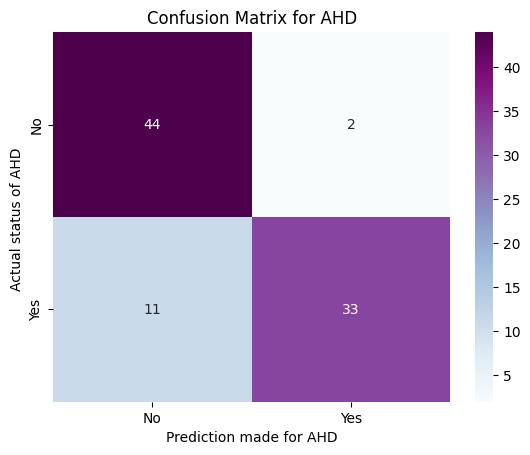

In [ ]:
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')  #BuPu=colour
ax.set_title('Confusion Matrix for AHD');
ax.set_xlabel('Prediction made for AHD')
ax.set_ylabel('Actual status of AHD ');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion matrix : True negative   False negative
#                    False positive, True positive

Parameter tunning - logistic reg


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],    # l1=Lasso, l2=ridge
    'C': [0.001, 0.01, 0.1, 1, 10],          # inverse of regularization strength. Smaller values specify stronger regularization
    'max_iter': [150,200, 250],              # maximum number of iterations taken for the solver to converge
    'solver': ['liblinear', 'saga']          # used to optimize the logistic regression function
}
grid_search = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.01, 'max_iter': 150, 'penalty': 'l2', 'solver': 'liblinear'}


**through hyper-parameter tuning, it gives Ridge as optimal**

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        46
           1       0.94      0.73      0.82        44

    accuracy                           0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.86      0.84      0.84        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[44  2]
 [12 32]]


In [ ]:
# evaluate
best_model.score(x_test, y_test)


0.8444444444444444

Since we get optimal panelty as rigde in logistic regression, no need to do the rigde

**2) Support Vector Machine**

In [ ]:
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(x_train,y_train)


SVC(kernel='linear')

In [ ]:
#predict the response
y_pred2 = cls.predict(x_test)
y_pred2

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int8)

In [ ]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred2))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred2))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred2))
print(metrics.classification_report(y_test, y_pred2))

acuracy: 0.8666666666666667
precision: 0.9705882352941176
recall 0.75
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        46
           1       0.97      0.75      0.85        44

    accuracy                           0.87        90
   macro avg       0.89      0.86      0.86        90
weighted avg       0.89      0.87      0.86        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred2)
print(ConfusionMatrix)

[[45  1]
 [11 33]]


parameter tuning-SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.01,0.1, 1, 10,20,30],
              'gamma': [0.0001, 0.001, 0.1, 1]}

# Create SVM classifier
svm_classifier = SVC()
# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

{'C': 30, 'gamma': 0.0001}


In [ ]:
# Create a new SVM classifier with optimal parameters
optimal_svm_classifier = SVC(C=best_params['C'], gamma=best_params['gamma'])

# Refit the classifier on the entire training data
optimal_svm_classifier.fit(x_train, y_train)
y_pred3 = optimal_svm_classifier.predict(x_test)
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        46
           1       0.97      0.70      0.82        44

    accuracy                           0.84        90
   macro avg       0.87      0.84      0.84        90
weighted avg       0.87      0.84      0.84        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred3)
print(ConfusionMatrix)

[[45  1]
 [13 31]]


**3) Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="gini",
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
y_pred3 = rf.predict(x_test)
y_pred3

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int8)

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred3)
print(ConfusionMatrix)

[[43  3]
 [12 32]]


In [ ]:
# overall accuracy of the model
accuracy_score(y_test,y_pred3)

0.8333333333333334

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        55
           1       0.73      0.91      0.81        35

    accuracy                           0.83        90
   macro avg       0.83      0.85      0.83        90
weighted avg       0.85      0.83      0.84        90



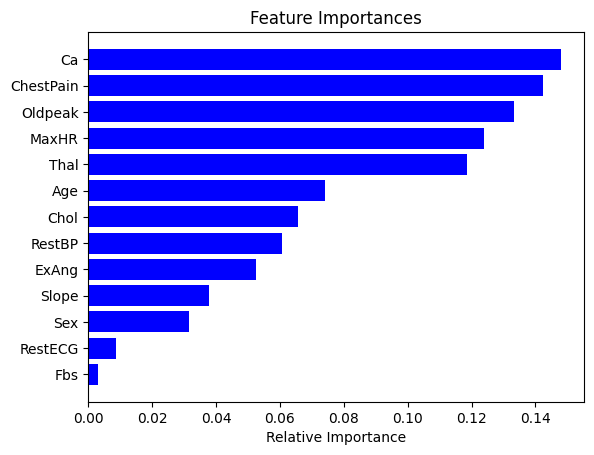

In [ ]:
# feature importance
features = df_heart.columns
importances=clf.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color="b",align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Hyper parameter tuning -random forest

In [ ]:
param_grid = {
    'n_estimators': [75,150,200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'min_samples_split':[2,5,8],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=6,
                       min_samples_split=8, n_estimators=200)


In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features="log2",
                                    max_leaf_nodes=6,
                                    min_samples_split=8,
                                    n_estimators=200)
model_grid.fit(x_train, y_train)
y_pred_grid = model.predict(x_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.73      0.89      0.80        36

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.84      0.82      0.82        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred_grid)
print(ConfusionMatrix)

[[42  4]
 [12 32]]




**4) Naive Bayes**

To apply naive bayes, variables should be independent and
all the quantitative variables should be convert to categorical variables if they are skewed; to do this we need to consider the describution by considering descriptive analysis

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred4 = nb.predict(x_test)
print(classification_report(y_pred4, y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        56
           1       0.73      0.94      0.82        34

    accuracy                           0.84        90
   macro avg       0.84      0.86      0.84        90
weighted avg       0.87      0.84      0.85        90



parameter tuning- naive bayes

In [ ]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
nb_classifier = GaussianNB()
# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

{'var_smoothing': 1e-09}


In [ ]:
# Refit the classifier on the entire training data
optimal_nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimal_nb_classifier.fit(x_train, y_train)
y_pred4 = optimal_nb_classifier.predict(x_test)
print(classification_report(y_pred4, y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        56
           1       0.73      0.94      0.82        34

    accuracy                           0.84        90
   macro avg       0.84      0.86      0.84        90
weighted avg       0.87      0.84      0.85        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred4)
print(ConfusionMatrix)

[[44  2]
 [12 32]]


**5) XGBoost Classifier**

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=21)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=21, ...)

In [ ]:
y_pred5=xgb_model.predict(x_test)
print(classification_report(y_pred5, y_test))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72        73
           1       0.32      0.82      0.46        17

    accuracy                           0.63        90
   macro avg       0.63      0.71      0.59        90
weighted avg       0.82      0.63      0.67        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred5)
print(ConfusionMatrix)

[[43  3]
 [30 14]]


**parameter** **tuning**- **XGB**

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}
xgb_model = xgb.XGBClassifier()
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
xgb_optimal=random_search.fit(x_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.05646051858856476, 'max_depth': 4, 'n_estimators': 61, 'subsample': 0.5084445858694999}
Best score:  0.8041811846689896


In [ ]:
y_pred5_optimal=xgb_optimal.predict(x_test)
print(classification_report(y_pred5_optimal, y_test))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74        75
           1       0.32      0.93      0.47        15

    accuracy                           0.66        90
   macro avg       0.65      0.77      0.61        90
weighted avg       0.87      0.66      0.70        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred5_optimal)
print(ConfusionMatrix)

[[45  1]
 [30 14]]


**6) KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred6 = knn.predict(x_test)
print(classification_report(y_pred6, y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.73      0.89      0.80        36

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.84      0.82      0.82        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred6)
print(ConfusionMatrix)

[[42  4]
 [12 32]]


parameter tuning-Knn

In [ ]:
param_grid = {
    'n_neighbors': range(1, 31),  # Try different values of k from 1 to 30
    'weights': ['uniform', 'distance'],  # Try different weightings for neighbors
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}
# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='precision')
grid_search.fit(x_train, y_train)
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}


In [ ]:
# Get the best model
best_knn_model = grid_search.best_estimator_

knn_optimal = best_knn_model.fit(x_train, y_train)

y_pred6_optimal=knn_optimal.predict(x_test)
print(classification_report(y_pred6_optimal, y_test))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        57
           1       0.68      0.91      0.78        33

    accuracy                           0.81        90
   macro avg       0.81      0.83      0.81        90
weighted avg       0.84      0.81      0.81        90



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred6_optimal)
print(ConfusionMatrix)

[[43  3]
 [14 30]]


**Model evaluation-ROC/AUC curve**

This ROC curves are fit for original models, (not for models with hyper parameters)

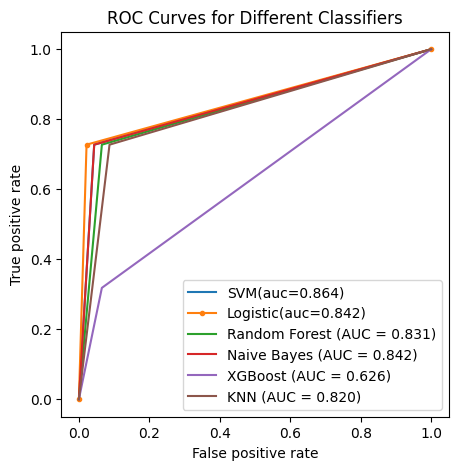

In [ ]:
# ROC-AUC curve
from sklearn.metrics import roc_curve, auc

# Logistic reg
logistic_fpr, logistic_tpr, threshold=roc_curve(y_test,y_pred)
auc_logistic = auc(logistic_fpr,logistic_tpr)

# SVM
svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred2)
auc_svm = auc(svm_fpr,svm_tpr)

# Random Forest Classifier
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred3)
auc_rf = auc(rf_fpr, rf_tpr)

# Naive Bayes
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred4)
auc_nb = auc(nb_fpr, nb_tpr)

# XGBoost Classifier
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred5)
auc_xgb = auc(xgb_fpr, xgb_tpr)

# KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred6)
auc_knn = auc(knn_fpr, knn_tpr)


plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,linestyle="-",label='SVM(auc=%0.3f)' % auc_svm)
plt.plot(svm_fpr,logistic_tpr,marker=".",label='Logistic(auc=%0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle="-", label='Random Forest (AUC = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, linestyle="-", label='Naive Bayes (AUC = %0.3f)' % auc_nb)
plt.plot(xgb_fpr, xgb_tpr, linestyle="-", label='XGBoost (AUC = %0.3f)' % auc_xgb)
plt.plot(knn_fpr, knn_tpr, linestyle="-", label='KNN (AUC = %0.3f)' % auc_knn)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.show()

**Feature selection using ANOVA F-value and refit**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Perform feature selection
# Here we use univariate feature selection with ANOVA F-value
# You can change the score function and the number of features as per your requirements
selector = SelectKBest(score_func=f_classif, k=5)  # Select the top 2 features
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

# Get indices of selected features
selected_feature_indices = selector.get_support(indices=True)
print(selected_feature_indices )

# Refit the model using only the selected features
selected_features_train = x_train[:, selected_feature_indices]
selected_features_test = x_test[:, selected_feature_indices]

[ 2  7  8  9 11]


In [ ]:
# refit KNN using important features
knn = KNeighborsClassifier()
knn.fit(selected_features_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(selected_features_test, y_test)
print("Accuracy on test set with selected features:", accuracy)

Accuracy on test set with selected features: 0.8333333333333334
